In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("/Users/prince/Downloads/water-treatment.csv")
data.head()
columns= data.columns

In [3]:
data.iloc[:,0]

0       D-2/3/90
1       D-4/3/90
2       D-5/3/90
3       D-6/3/90
4       D-7/3/90
         ...    
521    D-26/8/91
522    D-27/8/91
523    D-28/8/91
524    D-29/8/91
525    D-30/8/91
Name: D-1/3/90, Length: 526, dtype: object

In [4]:
data.iloc[:,0]=data.iloc[:,0].astype('category')
data.iloc[:,0]=data.iloc[:,0].cat.codes

# Cleansing

In [5]:
data = data.replace('?',0)

# Standardisation

In [6]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data)

In [7]:
data1

array([[-0.43136705,  0.32841406,  0.23761155, ...,  0.28594406,
         0.32975458,  0.28460866],
       [ 1.08335693, -0.39508584,  0.96563644, ...,  0.08806882,
         0.07985709,  0.22140323],
       [ 1.18872903, -0.09759375,  0.41961777, ...,  0.43568749,
         0.14600642,  0.28460866],
       ...,
       [ 0.65528276, -0.32129843, -0.74522206, ...,  0.15759255,
         0.09455694,  0.24247171],
       [ 0.76724062, -0.39923837, -0.74522206, ...,  0.68704253,
         0.1386565 ,  0.27618127],
       [ 0.97139907, -0.58045939, -0.77798318, ...,  0.40359961,
        -0.08919121, -3.92908626]])

In [8]:
model = KMeans(n_clusters=5)
model.fit(data1)

KMeans(n_clusters=5)

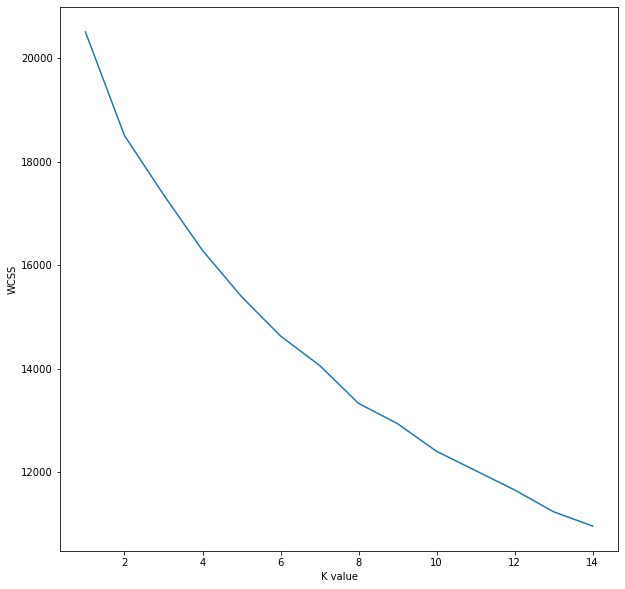

In [9]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(data1)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

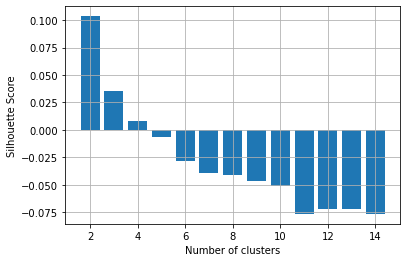

In [10]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(data1, KMeans(n_clusters = n_cluster).fit_predict(data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


# Best model at k = 2 from elbow method

In [11]:
best_model = KMeans(n_clusters=2)
best_model.fit(data)

KMeans(n_clusters=2)

In [12]:
label = best_model.fit_predict(data)

In [13]:
label_0 = data[label == 0]
label_1 = data[label == 1]

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data)
data["label"] = cluster


In [15]:
data.label.value_counts()

0    505
1     21
Name: label, dtype: int64

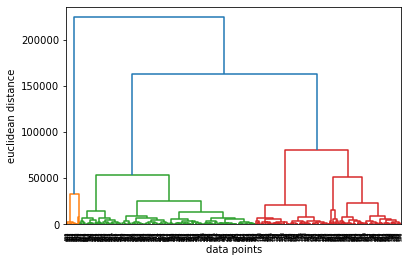

In [16]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [17]:
data.head()

,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6,label
0,197,39024,3.00,7.7,0,443,214,69.2,6.5,2660,...,0,60.7,94.8,0,80.8,0,79.5,92.1,100,0
1,427,32229,5.00,7.6,0,528,186,69.9,3.4,1666,...,0,58.2,95.6,0,52.9,0,75.8,88.7,98.5,0
2,443,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100,0
3,461,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,0,62.7,95.6,0,71.0,92.1,78.2,87.5,99.5,0
4,479,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,0,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100,0
